In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import TweetTokenizer
import string
from nltk import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from math import pi
from wordcloud import WordCloud

In [3]:
df_tweet = pd.read_csv('crowdflower-brands-and-product-emotions/data/judge_1377884607_tweet_product_company.csv')


In [4]:
df_tweet

tweet_text  \
0     .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1     @jessedee Know about @fludapp ? Awesome iPad/i...   
2     @swonderlin Can not wait for #iPad 2 also. The...   
3     @sxsw I hope this year's festival isn't as cra...   
4     @sxtxstate great stuff on Fri #SXSW: Marissa M...   
...                                                 ...   
8716                      Ipad everywhere. #SXSW {link}   
8717  Wave, buzz... RT @mention We interrupt your re...   
8718  Google's Zeiger, a physician never reported po...   
8719  Some Verizon iPhone customers complained their...   
8720  �ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mentio...   

     emotion_in_tweet_is_directed_at  \
0                             iPhone   
1                 iPad or iPhone App   
2                               iPad   
3                 iPad or iPhone App   
4                             Google   
...                              ...   
8716                            iPad   
8717                             NaN   
8718                             NaN   
8719                             NaN   
8720                             NaN   

     is_there_an_emotion_directed_at_a_brand_or_product  
0                                      Negative emotion  
1                                      Positive emotion  
2                                      Positive emotion  
3                                      Negative emotion  
4                                      Positive emotion  
...                                                 ...  
8716                                   Positive emotion  
8717                 No emotion toward brand or product  
8718                 No emotion toward brand or product  
8719                 No emotion toward brand or product  
8720                 No emotion toward brand or product  

[8721 rows x 3 columns]

In [5]:
df_tweet.head(10)

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   
5  @teachntech00 New iPad Apps For #SpeechTherapy...   
6                                                NaN   
7  #SXSW is just starting, #CTIA is around the co...   
8  Beautifully smart and simple idea RT @madebyma...   
9  Counting down the days to #sxsw plus strong Ca...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   
5                             NaN   
6                             NaN   
7                         Android   
8              iPad or iPhone App   
9                           Apple   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion  
5                 No emotion toward brand or product  
6                 No emotion toward brand or product  
7                                   Positive emotion  
8                                   Positive emotion  
9                                   Positive emotion

In [6]:
df_tweet.columns

Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

In [7]:
df_tweet.columns = ['Tweet', 'Company/Product', 'Sentiment']

In [8]:
df_tweet.columns

Index(['Tweet', 'Company/Product', 'Sentiment'], dtype='object')

In [9]:
df_tweet.head()

Tweet     Company/Product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

          Sentiment  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

In [10]:
df_tweet['Company/Product'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [11]:
df_tweet['Tweet']

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
8716                        Ipad everywhere. #SXSW {link}
8717    Wave, buzz... RT @mention We interrupt your re...
8718    Google's Zeiger, a physician never reported po...
8719    Some Verizon iPhone customers complained their...
8720    �ϡ�����_��ʋ�΋�ҋ�������⋁_��������_���RT @mentio...
Name: Tweet, Length: 8721, dtype: object

In [12]:
df_tweet['Tweet'].value_counts()

RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw                           5
RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW                           4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                        4
RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW                                        3
Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw                                                    2
                                                                                                                                        ..
RT @mention IPad, tablet, etc are aiding in greater adoption of mobile devices because screen size is larger #mobilefarm #SXSW           1
SXSW 2011: Novelty of iPad 

In [13]:
df_tweet["Sentiment"]


0                         Negative emotion
1                         Positive emotion
2                         Positive emotion
3                         Negative emotion
4                         Positive emotion
                       ...                
8716                      Positive emotion
8717    No emotion toward brand or product
8718    No emotion toward brand or product
8719    No emotion toward brand or product
8720    No emotion toward brand or product
Name: Sentiment, Length: 8721, dtype: object

In [14]:
df_tweet['Sentiment'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [15]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8721 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8720 non-null   object
 1   Company/Product  3169 non-null   object
 2   Sentiment        8721 non-null   object
dtypes: object(3)
memory usage: 204.5+ KB


In [16]:
df_tweet[df_tweet['Tweet'].isna()]

Tweet Company/Product                           Sentiment
6   NaN             NaN  No emotion toward brand or product

In [17]:
df_tweet = df_tweet[df_tweet['Tweet'].isna() == False]
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8720 non-null   object
 1   Company/Product  3169 non-null   object
 2   Sentiment        8720 non-null   object
dtypes: object(3)
memory usage: 272.5+ KB


In [18]:
df_tweet[df_tweet['Company/Product'].isna()].head()


Tweet Company/Product  \
5   @teachntech00 New iPad Apps For #SpeechTherapy...             NaN   
16  Holler Gram for iPad on the iTunes App Store -...             NaN   
32  Attn: All  #SXSW frineds, @mention Register fo...             NaN   
33      Anyone at  #sxsw want to sell their old iPad?             NaN   
34  Anyone at  #SXSW who bought the new iPad want ...             NaN   

                             Sentiment  
5   No emotion toward brand or product  
16  No emotion toward brand or product  
32  No emotion toward brand or product  
33  No emotion toward brand or product  
34  No emotion toward brand or product

In [19]:

df_tweet['Company/Product'].fillna('Unknown', inplace=True)


/Users/musa/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [20]:
df_tweet.isna().sum()

Tweet              0
Company/Product    0
Sentiment          0
dtype: int64

In [21]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8720 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8720 non-null   object
 1   Company/Product  8720 non-null   object
 2   Sentiment        8720 non-null   object
dtypes: object(3)
memory usage: 272.5+ KB


In [22]:
df_tweet['Sentiment'].value_counts()

No emotion toward brand or product    5155
Positive emotion                      2869
Negative emotion                       545
I can't tell                           151
Name: Sentiment, dtype: int64

In [23]:
emotion_dict = {'Positive emotion': 'Positive', 'Negative emotion': 'Negative', 
                'No emotion toward brand or product': 'Neutral', 
                "I can't tell": 'Unknown'}
df_tweet['Sentiment'] = df_tweet['Sentiment'].map(emotion_dict)
df_tweet.head()

<ipython-input-23-7f5cfa3bd7a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['Sentiment'] = df_tweet['Sentiment'].map(emotion_dict)


Tweet     Company/Product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

  Sentiment  
0  Negative  
1  Positive  
2  Positive  
3  Negative  
4  Positive

In [24]:
df_tweet['Sentiment'].value_counts()

Neutral     5155
Positive    2869
Negative     545
Unknown      151
Name: Sentiment, dtype: int64

In [25]:
df_tweet[df_tweet['Sentiment']=='Unknown']

Tweet Company/Product  \
88    Thanks to @mention for publishing the news of ...         Unknown   
100   ���@mention &quot;Apple has opened a pop-up st...         Unknown   
228   Just what America needs. RT @mention Google to...         Unknown   
330   The queue at the Apple Store in Austin is FOUR...         Unknown   
357   Hope it's better than wave RT @mention Buzz is...         Unknown   
...                                                 ...             ...   
8650  It's funny watching a room full of people hold...         Unknown   
8662  @mention yeah, we have @mention , Google has n...         Unknown   
8667  @mention Yes, the Google presentation was not ...         Unknown   
8687  &quot;Do you know what Apple is really good at...         Unknown   
8695  How much you want to bet Apple is disproportio...           Apple   

     Sentiment  
88     Unknown  
100    Unknown  
228    Unknown  
330    Unknown  
357    Unknown  
...        ...  
8650   Unknown  
8662   Unknown  
8667   Unknown  
8687   Unknown  
8695   Unknown  

[151 rows x 3 columns]

In [26]:
df_tweet = df_tweet[df_tweet['Sentiment']!='Unknown']
df_tweet["Sentiment"].value_counts()

Neutral     5155
Positive    2869
Negative     545
Name: Sentiment, dtype: int64

In [27]:
df_tweet[df_tweet.duplicated()]

Tweet     Company/Product  \
457      Before It Even Begins, Apple Wins #SXSW {link}               Apple   
752   Google to Launch Major New Social Network Call...             Unknown   
2138  Marissa Mayer: Google Will Connect the Digital...             Unknown   
2437  Counting down the days to #sxsw plus strong Ca...               Apple   
3759  Really enjoying the changes in Gowalla 3.0 for...         Android App   
3771  #SXSW is just starting, #CTIA is around the co...             Android   
4669  Oh. My. God. The #SXSW app for iPad is pure, u...  iPad or iPhone App   
5107  RT @mention ��� GO BEYOND BORDERS! ��_ {link} ...             Unknown   
5110  RT @mention ��� Happy Woman's Day! Make love, ...             Unknown   
5650  RT @mention Google to Launch Major New Social ...             Unknown   
5651  RT @mention Google to Launch Major New Social ...             Unknown   
5652  RT @mention Google to Launch Major New Social ...             Unknown   
5653  RT @mention Google to Launch Major New Social ...             Unknown   
5654  RT @mention Google to Launch Major New Social ...             Unknown   
6065  RT @mention Marissa Mayer: Google Will Connect...              Google   
6066  RT @mention Marissa Mayer: Google Will Connect...             Unknown   
6067  RT @mention Marissa Mayer: Google Will Connect...              Google   
6068  RT @mention Marissa Mayer: Google Will Connect...             Unknown   
6069  RT @mention Marissa Mayer: Google Will Connect...             Unknown   
6315  RT @mention RT @mention Google to Launch Major...             Unknown   
8146  I just noticed DST is coming this weekend. How...              iPhone   
8394  Need to buy an iPad2 while I'm in Austin at #s...                iPad   

     Sentiment  
457   Positive  
752    Neutral  
2138   Neutral  
2437  Positive  
3759  Positive  
3771  Positive  
4669  Positive  
5107   Neutral  
5110   Neutral  
5650   Neutral  
5651   Neutral  
5652   Neutral  
5653   Neutral  
5654   Neutral  
6065  Positive  
6066   Neutral  
6067  Positive  
6068   Neutral  
6069   Neutral  
6315   Neutral  
8146  Negative  
8394  Positive

In [28]:
len(df_tweet[df_tweet.duplicated()])

22

In [29]:
df_tweet.drop_duplicates(keep='first', inplace =True)
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8547 entries, 0 to 8720
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tweet            8547 non-null   object
 1   Company/Product  8547 non-null   object
 2   Sentiment        8547 non-null   object
dtypes: object(3)
memory usage: 267.1+ KB


In [30]:
def countplot(df_tweet, columns, hue=None, rotation=90):
    df_filtered = df_tweet[df_tweet[columns] != "Unknown"]
    if hue:
        df_filtered = df_filtered[df_filtered[hue] != "Unknown"]
    fig, ax = plt.subplots(figsize=(12,8))
    sns.countplot(data= df_filtered, x=columns, hue=hue, order = df_filtered[columns].value_counts().index)
    ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=rotation, fontsize= 20)
    ax.set_xlabel(xlabel = columns, fontsize = 20)
    ax.tick_params(axis='y', which='major')
    ax.set_ylabel(ylabel = "Number of Tweets", fontsize = 20)
    ax.set_title(f"Number of Tweets per {columns}", fontsize = 30)
    plt.show()

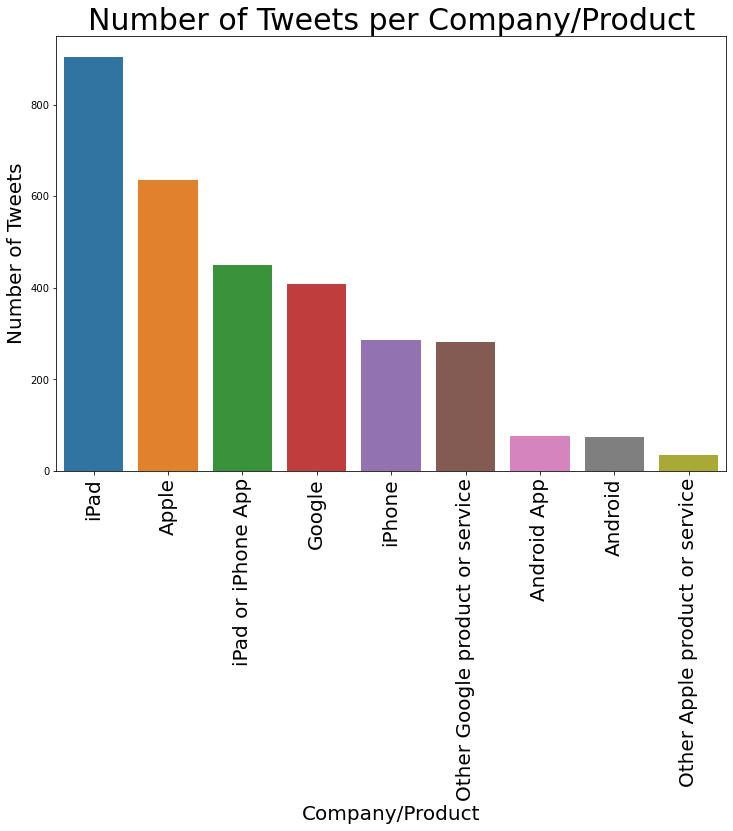

In [31]:
countplot( df_tweet, 'Company/Product')

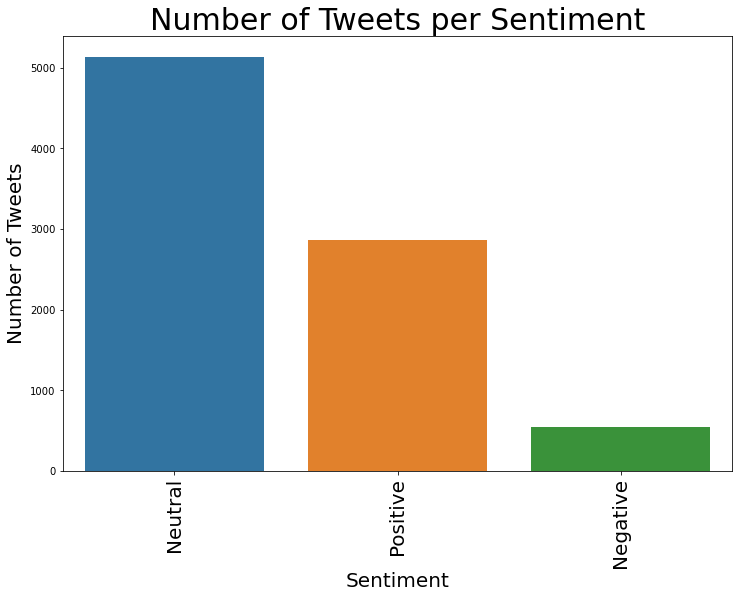

In [32]:
countplot (df_tweet, 'Sentiment')

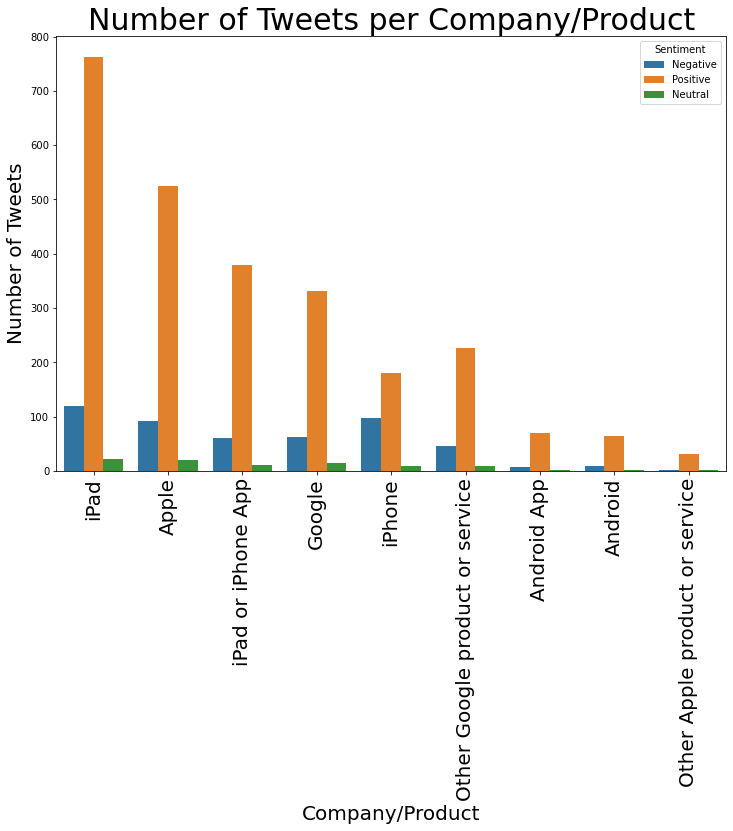

In [33]:
countplot(df_tweet, 'Company/Product', hue='Sentiment')

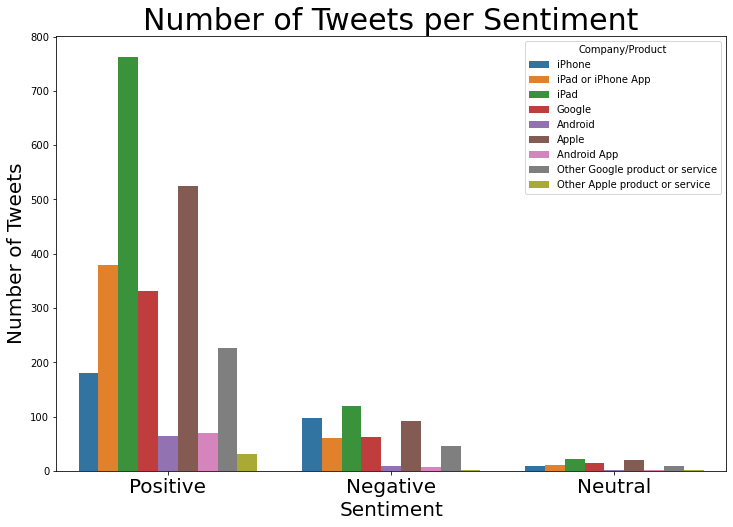

In [34]:
countplot(df_tweet, 'Sentiment', hue='Company/Product', rotation=None)


In [35]:
df_positive = df_tweet[df_tweet['Sentiment']=='Positive']
df_positive['Sentiment'].value_counts()


Positive    2861
Name: Sentiment, dtype: int64

In [36]:
pos_corpus = df_positive['Tweet'].to_list()
pos_corpus[:5]

["@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB']

## Tokenization

In [37]:
def tokenize_tweets(corpus, preserve_case=False, strip_handles=True):
    tokenizer = TweetTokenizer(preserve_case=preserve_case, 
                               strip_handles=strip_handles)
    tokens = tokenizer.tokenize(','.join(corpus))
    return tokens
    

In [38]:
tokens_pos = tokenize_tweets(pos_corpus)

In [39]:
#displaying 10 most common tokens
freq = FreqDist(tokens_pos)
freq.most_common(10)

[(',', 3941),
 ('#sxsw', 2874),
 ('.', 2175),
 ('the', 1551),
 ('!', 1197),
 ('link', 1167),
 ('{', 1164),
 ('}', 1164),
 ('to', 1119),
 ('at', 999)]

## Lemmatizaton

In [40]:
def process_tokens(tokens):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove punctuation
    lemmatized_tokens_no_punct = [token for token in lemmatized_tokens if token not in string.punctuation]
    
    # Remove English stop words
    stop_words = set(stopwords.words('english'))
    processed_tokens = [token for token in lemmatized_tokens_no_punct if token not in stop_words]
    
    return processed_tokens

In [41]:
tokens_pos_lemm = process_tokens(tokens_pos)

In [42]:
freq = FreqDist(tokens_pos_lemm)
freq.most_common(50)

[('#sxsw', 2874),
 ('link', 1170),
 ('ipad', 984),
 ('rt', 927),
 ('apple', 700),
 ('google', 585),
 ('2', 580),
 ('store', 535),
 ('�', 453),
 ('iphone', 450),
 ('app', 373),
 ('new', 352),
 ('austin', 243),
 ('...', 215),
 ('get', 174),
 ('launch', 166),
 ('#apple', 157),
 ('android', 152),
 ('party', 149),
 ('pop-up', 146),
 ('sxsw', 142),
 ('line', 138),
 ('time', 131),
 ('great', 128),
 ('day', 123),
 ('via', 122),
 ('social', 120),
 ('win', 118),
 ('#ipad2', 118),
 ('free', 116),
 ('cool', 116),
 ("i'm", 114),
 ('like', 110),
 ('map', 109),
 ('today', 109),
 ('one', 109),
 ('circle', 106),
 ('ha', 103),
 ('go', 103),
 ('come', 101),
 ('w', 99),
 ('wa', 97),
 ('#sxswi', 94),
 ('love', 91),
 ('network', 91),
 ('awesome', 90),
 ('good', 88),
 ('mobile', 87),
 ('opening', 86),
 ('downtown', 85)]

In [43]:
def updated_process_tokens(tokens):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove punctuation
    lemmatized_tokens_no_punct = [token for token in lemmatized_tokens if token not in string.punctuation]
    
    # Remove English stop words
    stop_words = set(stopwords.words('english'))
    additional_stop_words = ['#sxsw', 'sxsw', '#sxswi', 'link', 'rt']
    stop_words.update(additional_stop_words)
    processed_tokens_updated = [token for token in lemmatized_tokens_no_punct if token not in stop_words]
    
    return processed_tokens_updated

In [44]:
update_tokens_pos_lemm = updated_process_tokens(tokens_pos)

In [45]:
def most_frequent_tokens(tokens, n=50):
    # Calculate the frequency distribution of the tokens
    freq_dist = nltk.FreqDist(tokens)
    
    # Return the n most common tokens
    return freq_dist.most_common(n)

In [46]:
most_frequent_tokens(update_tokens_pos_lemm)

[('ipad', 984),
 ('apple', 700),
 ('google', 585),
 ('2', 580),
 ('store', 535),
 ('�', 453),
 ('iphone', 450),
 ('app', 373),
 ('new', 352),
 ('austin', 243),
 ('...', 215),
 ('get', 174),
 ('launch', 166),
 ('#apple', 157),
 ('android', 152),
 ('party', 149),
 ('pop-up', 146),
 ('line', 138),
 ('time', 131),
 ('great', 128),
 ('day', 123),
 ('via', 122),
 ('social', 120),
 ('win', 118),
 ('#ipad2', 118),
 ('free', 116),
 ('cool', 116),
 ("i'm", 114),
 ('like', 110),
 ('map', 109),
 ('today', 109),
 ('one', 109),
 ('circle', 106),
 ('ha', 103),
 ('go', 103),
 ('come', 101),
 ('w', 99),
 ('wa', 97),
 ('love', 91),
 ('network', 91),
 ('awesome', 90),
 ('good', 88),
 ('mobile', 87),
 ('opening', 86),
 ('downtown', 85),
 ('temporary', 84),
 ('#ipad', 83),
 ('people', 82),
 ('#iphone', 79),
 ('got', 79)]

In [115]:
#defining a function for wordcloud generation
def create_wordcloud(tokens_list, colormap= 'Greens', title='Word Cloud'):
    # Join the tokens into a single string
    text = ' '.join(tokens_list)
    
    # Generate a word cloud image
    wordcloud = WordCloud(width=500, height=300, background_color='black', colormap=colormap).generate(text)
    
    # Display the generated image:
    plt.figure(figsize=(12, 15), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

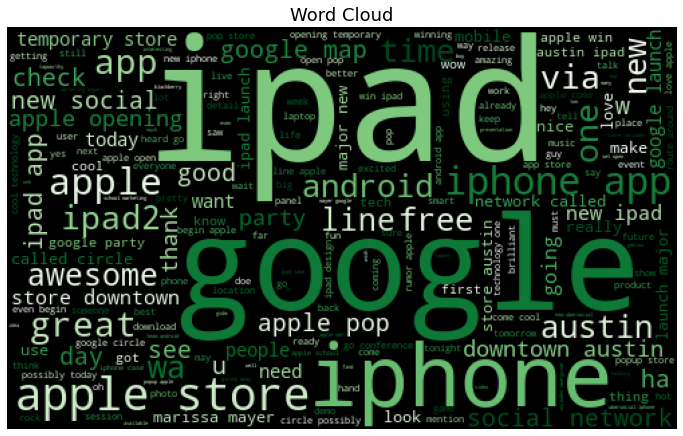

In [134]:
cloud_pos= create_wordcloud(update_tokens_pos_lemm)

In [94]:
def second_updated_process_tokens(tokens):
    # Initialize the WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    
    # Lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Remove punctuation
    lemmatized_tokens_no_punct = [token for token in lemmatized_tokens if token not in string.punctuation]
    
    # Remove English stop words
    stop_words = set(stopwords.words('english'))
    additional_stop_words = ['#sxsw', 'sxsw', '#sxswi', 'link', 'rt', 'ipad', 'apple', 'google', 'iphone', '#apple', '#google', '#ipad', '#iphone', 'android']
    stop_words.update(additional_stop_words)
    processed_tokens_updated_second = [token for token in lemmatized_tokens_no_punct if token not in stop_words]
    
    return processed_tokens_updated_second

In [95]:
second_update_tokens_pos_lemm = second_updated_process_tokens(tokens_pos)

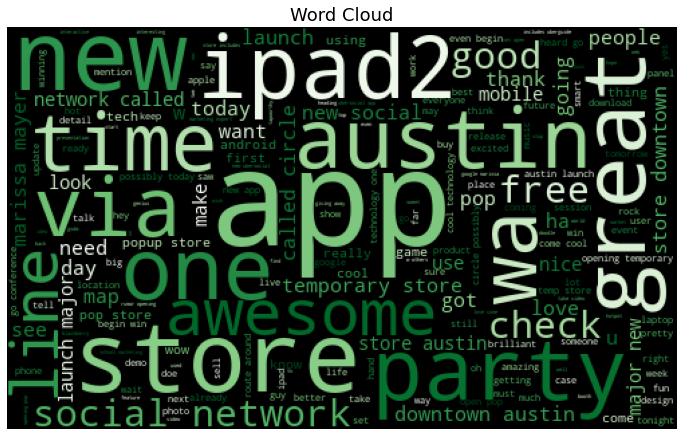

In [96]:
cloud_pos_wo_company= create_wordcloud(second_update_tokens_pos_lemm)

### Negative Sentiment Tweets

In [97]:
df_neg = df_tweet[df_tweet['Sentiment']=='Negative']
df_neg['Sentiment'].value_counts()

Negative    544
Name: Sentiment, dtype: int64

In [98]:
neg_corpus= df_neg['Tweet'].to_list()
neg_corpus

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 '@mention  - False Alarm: Google Circles Not Coming Now���and Probably Not Ever? - {link} #Google #Circles #Social #SXSW',
 'Again? RT @mention Line at the Apple store is insane.. #sxsw',
 'attending @mention iPad design headaches #sxsw {link}',
 'Boooo! RT @mention Flipboard is developing an iPhone version, not Android, says @mention #sxsw',
 "What !?!? @mention  #SXSW does not provide iPhone chargers?!?  I've changed my mind about going next year!",
 "Know that &quot;dataviz&quot; translates to &quot;satanic&quot; on an iPhone. I'm just sayin'. #sxsw",
 'Seriously #sxsw? Did you do any testing on the mobile apps? Constant iPad crashes ca

In [99]:
neg_tokens = tokenize_tweets(neg_corpus)


In [100]:
neg_freq = FreqDist(neg_tokens)
freq.most_common(10)

[('#sxsw', 2874),
 ('link', 1170),
 ('ipad', 984),
 ('rt', 927),
 ('apple', 700),
 ('google', 585),
 ('2', 580),
 ('store', 535),
 ('�', 453),
 ('iphone', 450)]

In [101]:
tokens_neg_lemm= process_tokens(neg_tokens)

In [102]:
updated_tokens_neg_lemm= updated_process_tokens(neg_tokens)

In [103]:
most_frequent_tokens(updated_tokens_neg_lemm)

[('ipad', 176),
 ('iphone', 140),
 ('google', 132),
 ('apple', 96),
 ('2', 80),
 ('�', 74),
 ('app', 58),
 ('store', 46),
 ('like', 43),
 ('...', 41),
 ('new', 41),
 ('need', 35),
 ('circle', 29),
 ('people', 29),
 ('ha', 29),
 ('design', 27),
 ('social', 27),
 ('get', 25),
 ('wa', 24),
 ('apps', 24),
 ('austin', 23),
 ('think', 23),
 ('time', 22),
 ('launch', 21),
 ('one', 21),
 ('look', 21),
 ('line', 20),
 ('say', 20),
 ('day', 20),
 ('today', 20),
 ('android', 19),
 ('would', 19),
 ('phone', 18),
 ('network', 17),
 ('headache', 16),
 ("i've", 16),
 ("i'm", 16),
 ('#ipad', 16),
 ('long', 16),
 ('product', 16),
 ('user', 15),
 ('news', 15),
 ('thing', 15),
 ('see', 15),
 ('much', 15),
 ('company', 15),
 ('america', 15),
 ('battery', 14),
 ('money', 14),
 ('#apple', 14)]

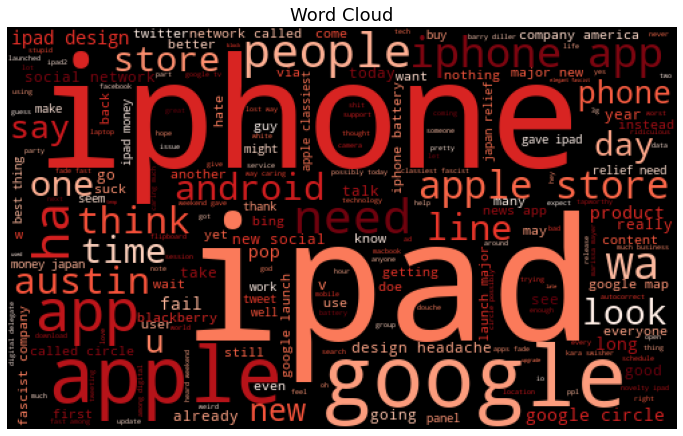

In [133]:
cloud_neg= create_wordcloud(updated_tokens_neg_lemm, colormap='Reds')

In [105]:
second_update_tokens_neg_lemm = second_updated_process_tokens(neg_tokens)

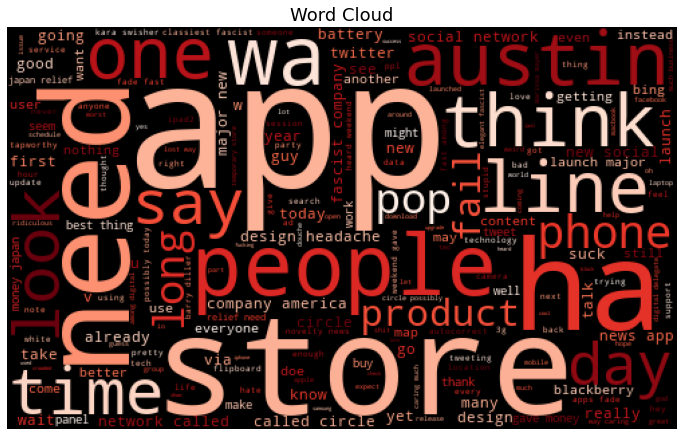

In [106]:
cloud_neg_wo_company= create_wordcloud(second_update_tokens_neg_lemm, colormap='Reds')

## Feature Engineering Company Column 


In [151]:
df_tweet['Company/Product'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [155]:
company_dict={'iPhone': 'Apple', 'iPad or iPhone App': 'Apple', 'iPad': 'Apple', 
            'Google': 'Google', 'Unknown': 'Unknown',
            'Android': 'Google', 'Apple': 'Apple', 'Android App': 'Google',
            'Other Google product or service': 'Google',
            'Other Apple product or service': 'Apple'}
df_tweet['Company'] = df_tweet['Company/Product'].map(company_dict)
df_tweet['Company'].unique()

array(['Apple', 'Google', 'Unknown'], dtype=object)

In [156]:
df_apple = df_tweet[df_tweet['Company']=='Apple']
corpus_apple = df_apple['Tweet'].to_list()

In [157]:
tokens_apple = tokenize_tweets(corpus_apple)

In [158]:
tokens_apple_lemm = process_tokens(tokens_apple)

In [159]:
tokens_apple_ls = updated_process_tokens(tokens_apple_lemm)

In [160]:
most_frequent_tokens(tokens_apple_ls)

[('ipad', 1086),
 ('apple', 760),
 ('2', 591),
 ('store', 548),
 ('iphone', 544),
 ('�', 344),
 ('app', 330),
 ('austin', 228),
 ('new', 222),
 ('...', 187),
 ('#apple', 159),
 ('pop-up', 151),
 ('get', 147),
 ('line', 143),
 ('#ipad2', 113),
 ('like', 110),
 ('one', 109),
 ("i'm", 107),
 ('ha', 102),
 ('win', 100),
 ('go', 99),
 ('#ipad', 96),
 ('via', 96),
 ('cool', 94),
 ('day', 93),
 ('wa', 90),
 ('time', 87),
 ('opening', 84),
 ('temporary', 84),
 ('downtown', 82),
 ('come', 78),
 ('apps', 78),
 ('launch', 77),
 ('free', 76),
 ('love', 76),
 ('great', 75),
 ('#iphone', 73),
 ('even', 72),
 ('open', 71),
 ('need', 69),
 ('awesome', 69),
 ('popup', 67),
 ('people', 65),
 ('good', 63),
 ('got', 63),
 ('want', 60),
 ('going', 59),
 ('first', 58),
 ('u', 58),
 ('pop', 57)]

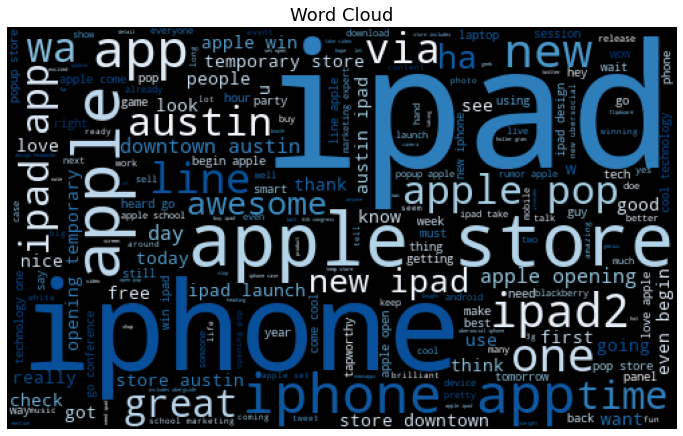

In [162]:
apple_cloud_w_company=create_wordcloud(tokens_apple_ls, colormap='Blues')

In [163]:
second_tokens_apple_ls = second_updated_process_tokens(tokens_apple_lemm)

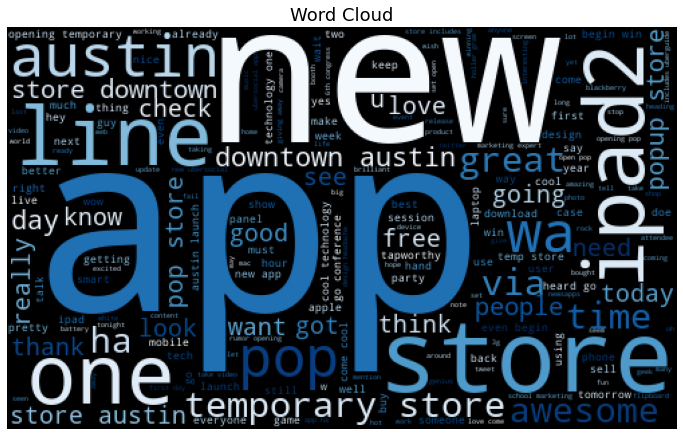

In [164]:
apple_cloud_wo_company = create_wordcloud(second_tokens_apple_ls, colormap='Blues')

In [165]:
df_apple_sentiment = pd.DataFrame(df_apple['Sentiment'].value_counts(normalize=True)).reset_index()
df_apple_sentiment.columns=['Sentiment', 'Percentage']
display(df_apple_sentiment)
df_apple_sentiment.sort_values('Percentage', ascending=True, inplace=True)

Sentiment  Percentage
0  Positive    0.812635
1  Negative    0.160537
2   Neutral    0.026828

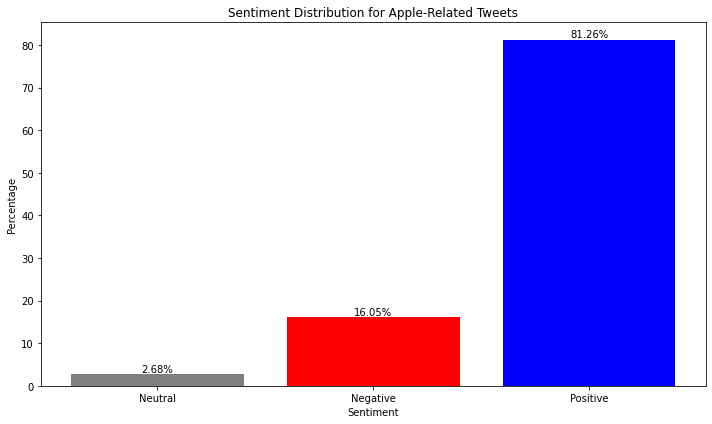

In [235]:
categories = ['Neutral', 'Negative', 'Positive']
percentages = [2.68, 16.05, 81.26]

# Creating bar plot
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(categories, percentages, color=['grey', 'red', 'blue', 'green'])

# Adding title and labels
plt.title('Sentiment Distribution for Apple-Related Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

# Adding percentage labels above bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage}%', ha='center')

# Show plot
plt.tight_layout()
plt.show()

In [223]:
def generate_product_wordcloud(company, sentiment, colormap='Greens'):
    company_df = df_tweet[df_tweet['Company']==company]
    final_df = company_df[company_df['Sentiment']==sentiment]
    product_lst = list(final_df['Company/Product'].unique())
    wordclouds={}
    for product in product_lst:
            token_df = final_df[final_df['Company/Product']==product]
            corpus = token_df['Tweet'].to_list()
            #tokenize tweets
            tokens_company = tokenize_tweets(corpus)
            #lemmatize tweets
            tokens_company_lemm = process_tokens(tokens_company)
            #remove stop words & punctuation using the same stop words list
            tokens_company_ls = second_updated_process_tokens(tokens_company_lemm) 
            wordclouds[product] = create_wordcloud(tokens_company_ls, 
                                     colormap=colormap)
            
    return wordclouds

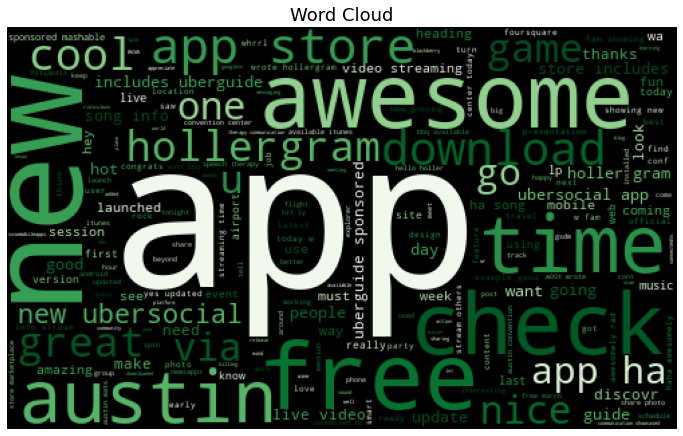

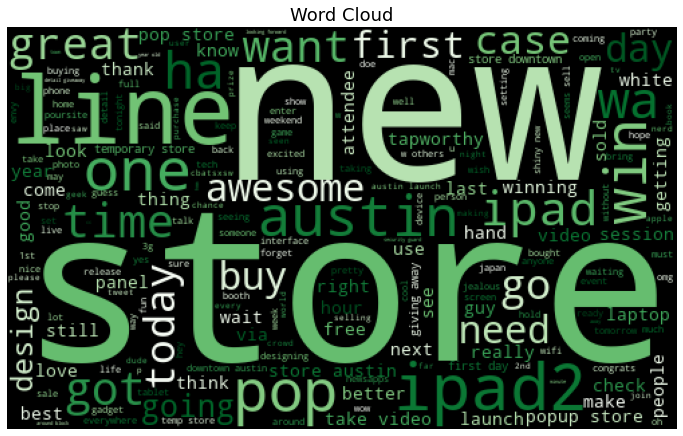

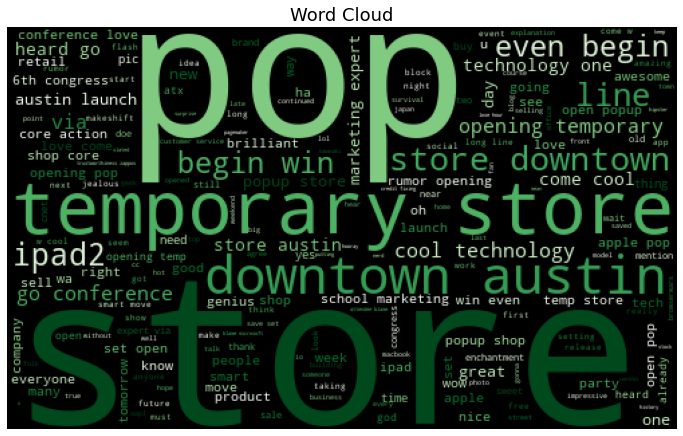

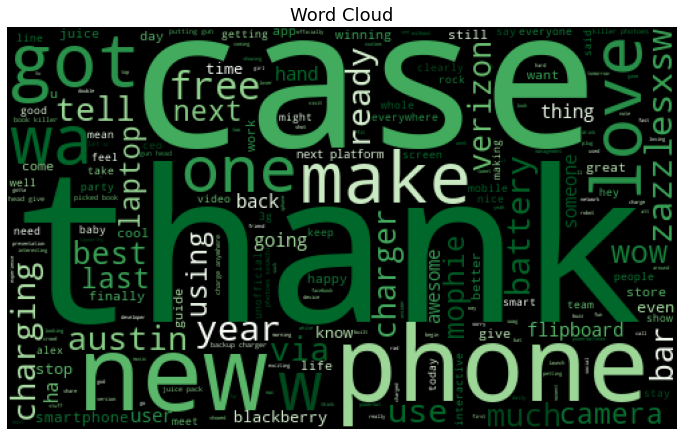

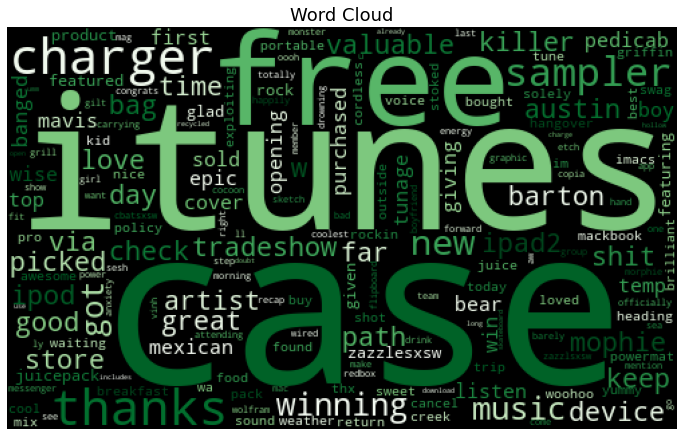

In [224]:
wordcloud_apple_pos = generate_product_wordcloud('Apple', 'Positive') 
                                                                
                                                                

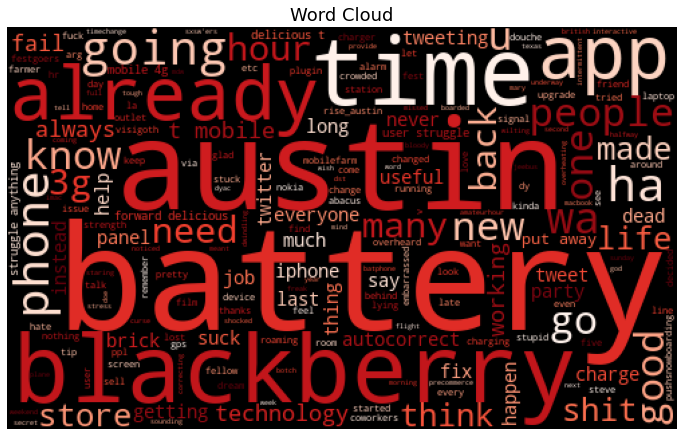

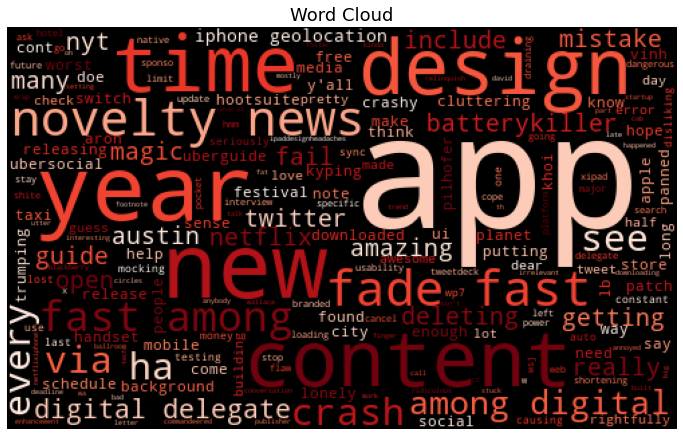

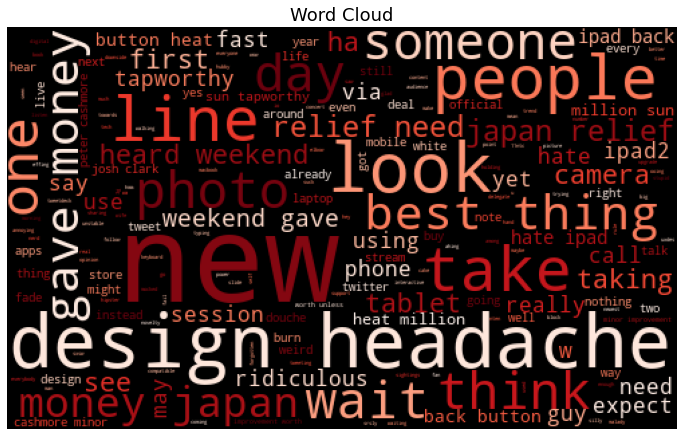

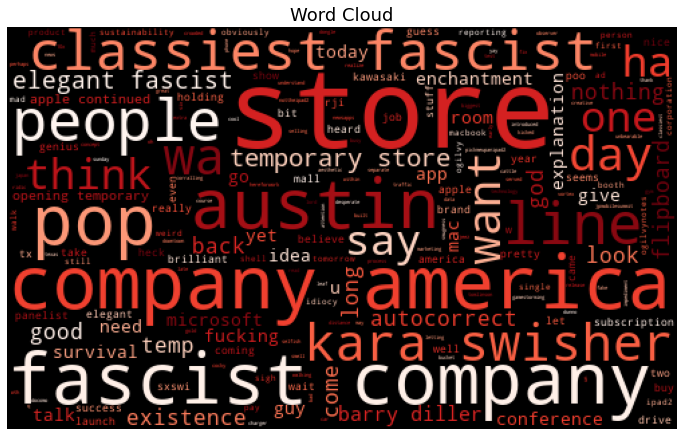

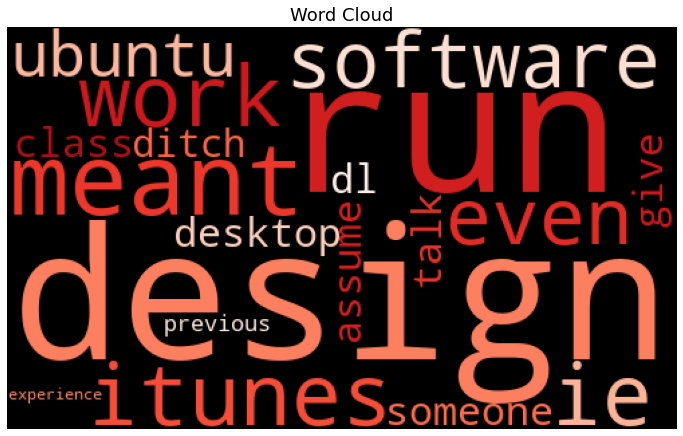

In [225]:
wordcloud_apple_neg = generate_product_wordcloud('Apple','Negative',colormap='Reds')

In [226]:
df_google = df_tweet[df_tweet['Company']=='Google']
corpus_google = df_google['Tweet'].to_list()

In [229]:
tokens_google = tokenize_tweets(corpus_google)
#lemmatize tweets
tokens_google_lemm = process_tokens(tokens_google)
#remove stop words & punctuation using the same stop words list
tokens_google_ls = updated_process_tokens(tokens_google_lemm)

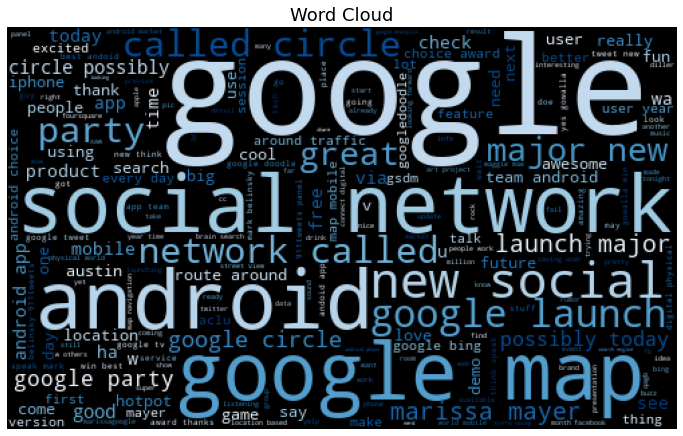

In [231]:
google_cloud_w_company=create_wordcloud(tokens_google_ls, colormap='Blues')

In [232]:
second_tokens_google_ls = second_updated_process_tokens(tokens_google_lemm)

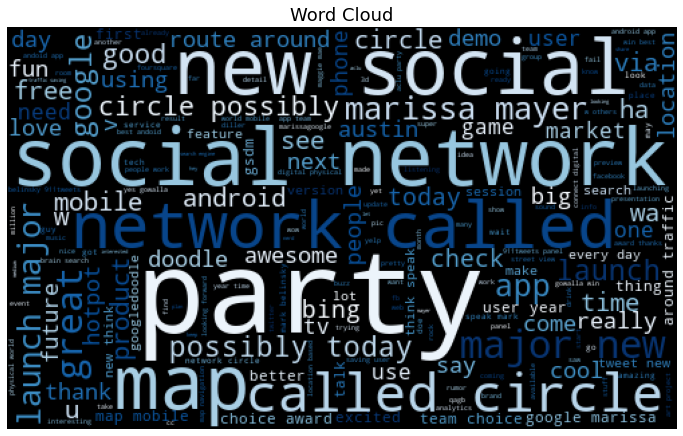

In [233]:
google_cloud_wo_company = create_wordcloud(second_tokens_google_ls, colormap='Blues')

In [236]:
df_google_sentiment = pd.DataFrame(df_google['Sentiment'].value_counts(normalize=True)).reset_index()
df_google_sentiment.columns=['Sentiment', 'Percentage']
display(df_google_sentiment)
df_google_sentiment.sort_values('Percentage', ascending=True, inplace=True)

Sentiment  Percentage
0  Positive    0.822619
1  Negative    0.147619
2   Neutral    0.029762

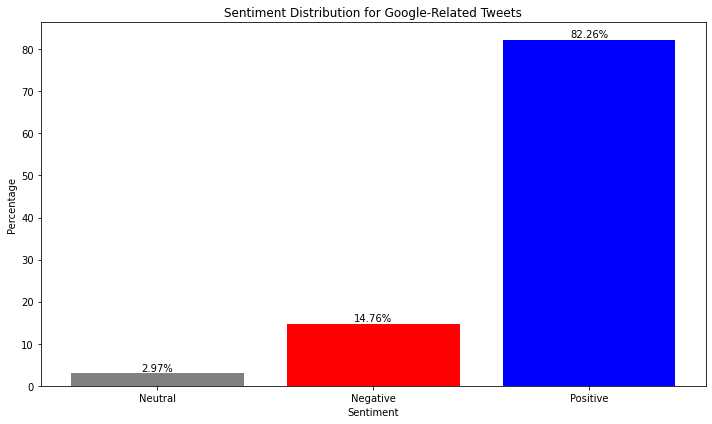

In [237]:
categories = ['Neutral', 'Negative', 'Positive']
percentages = [2.97, 14.76, 82.26]

# Creating bar plot
plt.figure(figsize=(10, 6), facecolor='white')
plt.bar(categories, percentages, color=['grey', 'red', 'blue', 'green'])

# Adding title and labels
plt.title('Sentiment Distribution for Google-Related Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

# Adding percentage labels above bars
for i, percentage in enumerate(percentages):
    plt.text(i, percentage + 0.5, f'{percentage}%', ha='center')

# Show plot
plt.tight_layout()
plt.show()

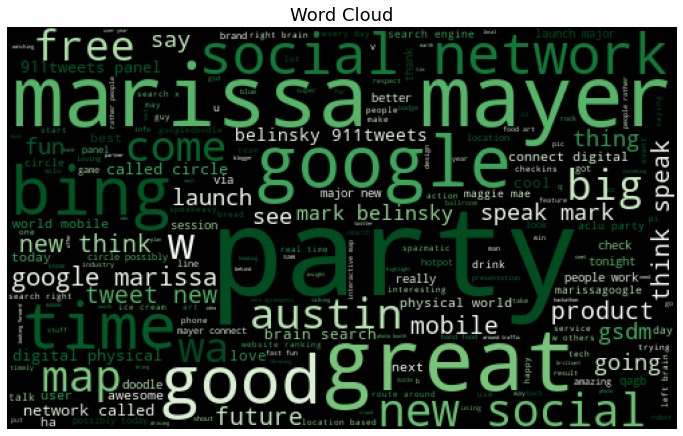

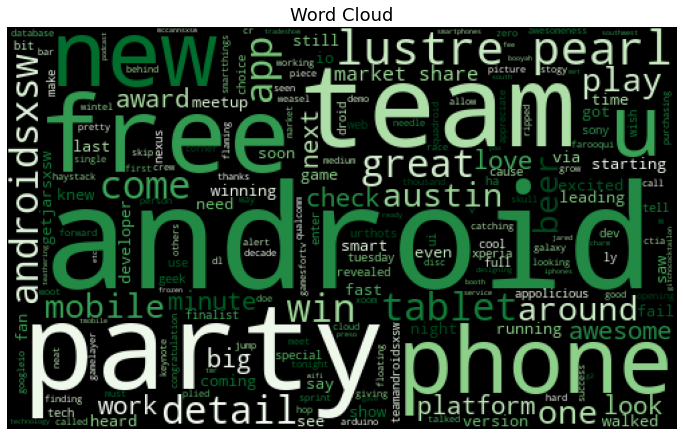

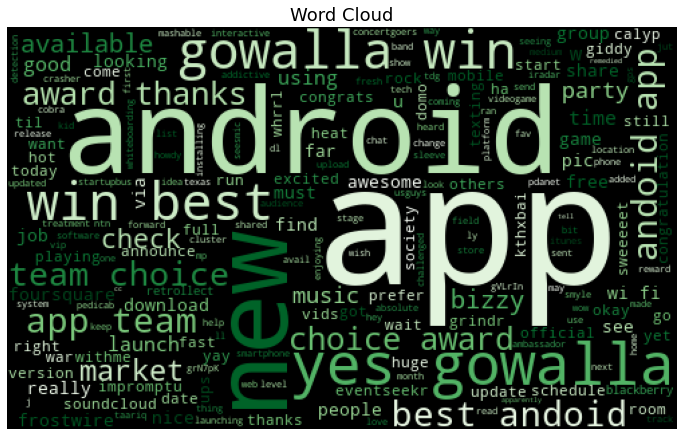

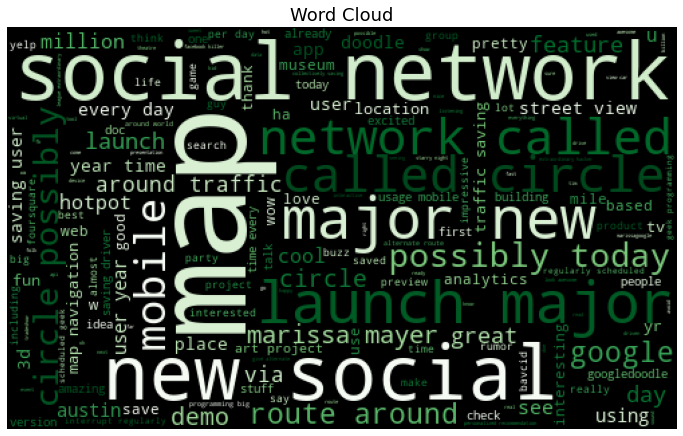

In [238]:
wordcloud_google_pos = generate_product_wordcloud('Google', 'Positive') 
                                                                  

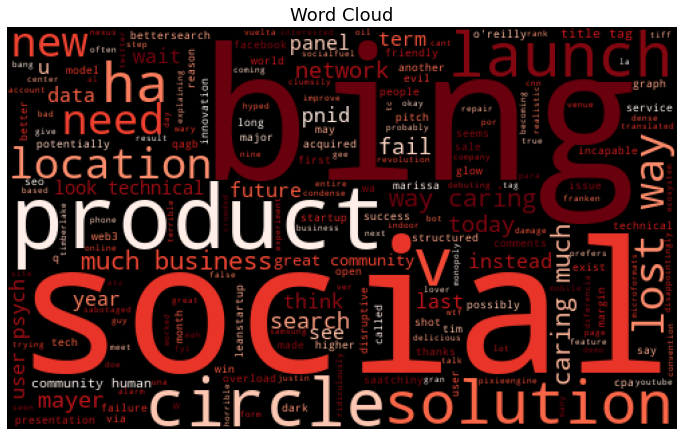

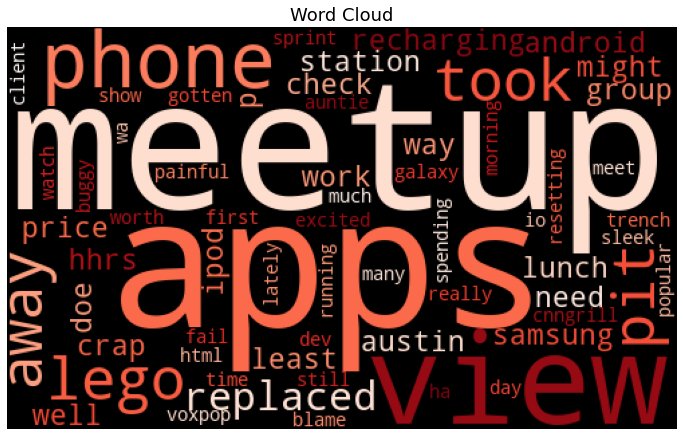

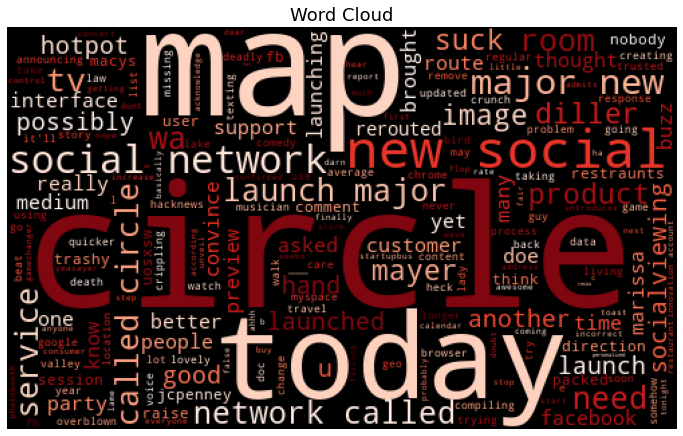

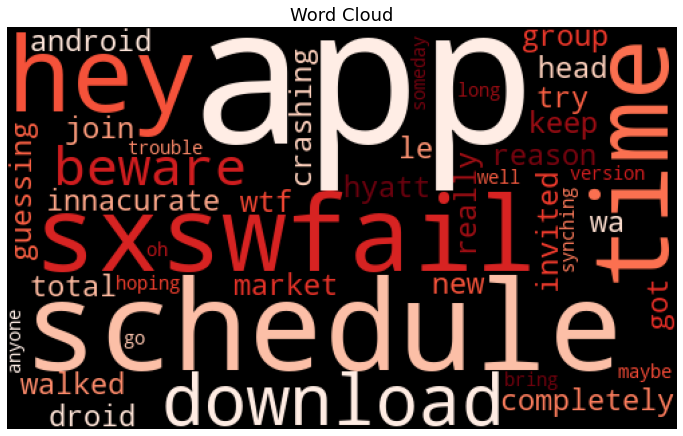

In [242]:
wordcloud_google_neg = generate_product_wordcloud('Google', 'Negative',colormap='Reds')

### Conclusions

Referring back to the questions we set out to answer, here were the observations based on our EDA on the tweets from the SXSW Conference:

**1. How is Apple perceived as a company during the SXSW Conference, and how does this compare to Google as one of their main competitors?**

- During the SXSW Conference, 81.1% of all tweets related to Apple were positive compared to Google's 82%.
- During the SXSW Conference, 16.1% of all tweets related to Apple were positive compared to Google's 14.9%

This suggests that both companies and their products and services are perceived mostly in a positive way. 

**2. How are Apple and Google's products and announcements perceived during the SXSW Conference? Are there specific pain points within the products that Apple should address?**

Apple - Positives:
- Tweets about Apple suggest that the temporary pop-up store announcement in downtown Austin has been received very well by Apple fans and generated a lot of excitement for the brand. 
- One of the most frequently talked about products was the iPad 2 which seems to have been launched during SXSW and sold in the Austin temporary pop-up store. Based on the tweets, Apple's launch of this product definitely generated a lot of buzz.
- Samplers and free products/services were frequently mentioned as well.

Apple - Negatives:
- The iPhone's battery is frequently discussed in negative tweets.
- Design of the iPad was referred to as a "design headache."
- There are several tweets mentioning Kara Swisher and references to Apple as a "fascist company."
- Several apps are referred to as "battery killer" and the design of the News app seems to have not been received positively.

Google - Positives:
- Google's party in Lustre Pearl generated a lot of buzz.
- Marissa Mayer is mentioned extensively, so her talk was positively received.
- Google's new social network project "Circle" seems to have caused a lot of excitement.
- Microsoft's Bing search engine is mentioned in a negative way.

Google - Negatives:
- Some users seem to be having issues with Android OS based on words such as "buggy", "replaced", and "painful."
- Samsung is mentioned in tweets with relation to Android suggesting some users may prefer it to Google's products.
- Users of Meetup are having problems with Android.